#Task 1: Dilation and Erosion
You are required to implement two functions that will simulate the behaviour of morphological Dilation and Erosion. For each of these functions, we will be considering a parameter, $SE$, which denotes the structuring element which we will need to preconstruct before passing them to the corresponding function.

Complete the two functions given in the following code cells:

In [ ]:
import numpy as np

def dilation(image, SE):
    img_h, img_w = image.shape
    se_h, se_w = SE.shape

    pad_h = se_h // 2
    pad_w = se_w // 2

    padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')
    dilated_image = np.zeros_like(image)

    for i in range(img_h):
        for j in range(img_w):
          region = padded[i:i+se_h, j:j+se_w]
          dilated_image[i, j] = np.max(region[SE == 1])

    return dilated_image


In [ ]:
def erosion(image, SE):
  img_h, img_w = image.shape
  se_h, se_w = SE.shape

  pad_h = se_h // 2
  pad_w = se_w // 2

  padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')
  eroded_image = np.zeros_like(image)

  for i in range(img_h):
      for j in range(img_w):
        region = padded[i:i+se_h, j:j+se_w]
        eroded_image[i, j] = np.min(region[SE == 1])

  return eroded_image


# Task 1: Output and Analysis
For this task, use an appropriate image from Chapter 09.zip. Use your previously implemented functions to show the outputs of the dilation and erosion functions on the sample image. In addition, generate required outputs to provide your analysis on the following observations:
<ol>
<li> What happens when you apply dilation on a sample image multiple times using the same structuring element? </li>

<li> What happens when you apply erosion on a sample image multiple times using the same structuring element? </li>

</ol>

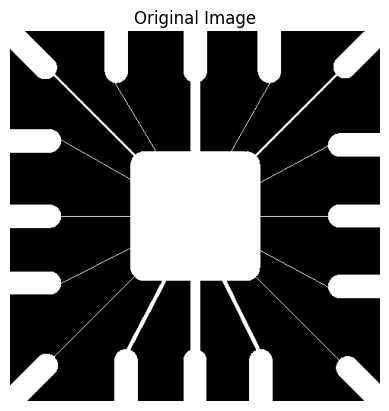

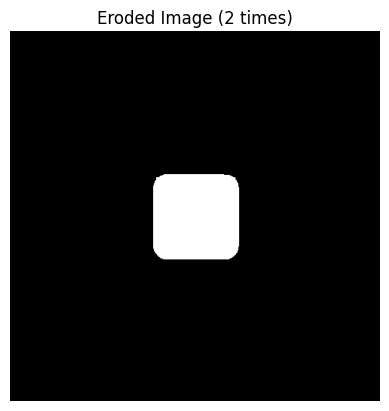

In [57]:
# Generate outputs for Task 1 here
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
os.makedirs('output_images', exist_ok=True)

image = cv2.imread("../DIP3E_CH09_Original_Images/Fig0905(a)(wirebond-mask).tif", cv2.IMREAD_GRAYSCALE)
cv2.imwrite('output_images/task1_original.png', image)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

SE = np.ones((30, 30), dtype=np.uint8)

dil_1 = dilation(image, SE)
cv2.imwrite('output_images/task1_dilated_1.png', dil_1)
dil_2 = dilation(dil_1, SE)
cv2.imwrite('output_images/task1_dilated_2.png', dil_2)
dil_3 = dilation(dil_2, SE)
cv2.imwrite('output_images/task1_dilated_3.png', dil_3)
dil_5 = dilation(dil_3, SE)
cv2.imwrite('output_images/task1_dilated_4.png', dil_5)  # Note: renamed to 4 since it's 4th dilation

ero_1 = erosion(image, SE)
cv2.imwrite('output_images/task1_eroded_1.png', ero_1)
ero_2 = erosion(ero_1, SE)
cv2.imwrite('output_images/task1_eroded_2_times.png', ero_2)
plt.imshow(ero_2, cmap='gray')
plt.title('Eroded Image (2 times)')
plt.axis('off')
plt.show()

##Analysis:
[Write your analysis here]

# Task 2
Granulometry is a field that deals with determining the size distribution of particles in an image. Determine the sizes of granules in "Fig0941(a)(wood_dowels).tif" which is an image of wood dowel plugs of two dominant sizes.

Your task is to write a function which should perform opening with circular SEs of variable sizes and generate a graph plot showing the difference in surface area vs radius of SE.

It is recommended to apply smoothing on the given image before you apply the Opening operations.

In [ ]:
def opening(image, SE):
  #implement this function
  # open_image = np.zeros_like(image)
  eroded = cv2.erode(image, SE)
  open_image = cv2.dilate(eroded, SE)

  return open_image

In [ ]:
def closing(image, SE):
  dilated = cv2.dilate(image, SE)
  close_image = cv2.erode(dilated, SE)

  return close_image

In [ ]:
def circular_se(radius):
    size = 2 * radius + 1
    y, x = np.ogrid[-radius:radius+1, -radius:radius+1]
    mask = x**2 + y**2 <= radius**2
    return mask.astype(np.uint8)

In [ ]:
import matplotlib.pyplot as plt
import cv2

def granulometry(image):
    radii = []
    diff_intensity = []
    avg_intensity = []
    prev_avg = None

    for r in range(5, 50, 5):  # Changed step to 5 to reduce displays
        SE = circular_se(r)
        open_image = opening(image, SE)

        # Save intermediate result
        cv2.imwrite(f'output_images/task2_opened_r{r}.png', open_image)

        # Display intermediate result
        print(f"Opening with radius = {r}")
        plt.imshow(open_image, cmap='gray')
        plt.title(f'Opened Image (radius {r})')
        plt.axis('off')
        plt.show()

        # Average intensity (granulometry measure)
        avg = np.mean(open_image)
        radii.append(r)
        avg_intensity.append(avg)

        # Store the intensity difference
        if prev_avg is not None:
            diff_intensity.append(prev_avg - avg)
        prev_avg = avg

    # Plot granulometry curve
    plt.figure(figsize=(6,4))
    plt.plot(radii, avg_intensity, marker='o')
    plt.xlabel("Structuring Element Radius")
    plt.ylabel("Average Intensity")
    plt.title("Granulometry Curve")
    plt.grid(True)
    plt.savefig('output_images/task2_granulometry_curve.png')
    plt.show()

    plt.figure(figsize=(6,4))
    plt.plot(radii[1:], diff_intensity, marker='o')
    plt.xlabel("Structuring Element Radius")
    plt.ylabel("Average Intensity difference")
    plt.title("Granulometry intensity difference Curve")
    plt.grid(True)
    plt.savefig('output_images/task2_intensity_difference_curve.png')
    plt.show()

    return radii, avg_intensity, diff_intensity

# Task 2: Output and Analysis
Use your previously implemented functions to show the output of the granulometry technique on the mentioned sample image.

Provide your analysis on the following topic:
<ol>
<li> Why is it recommended to apply smoothing first before performing the opening? </li>

</ol>

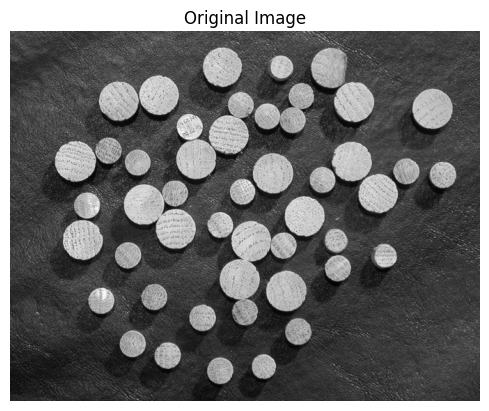

Opening with radius = 5


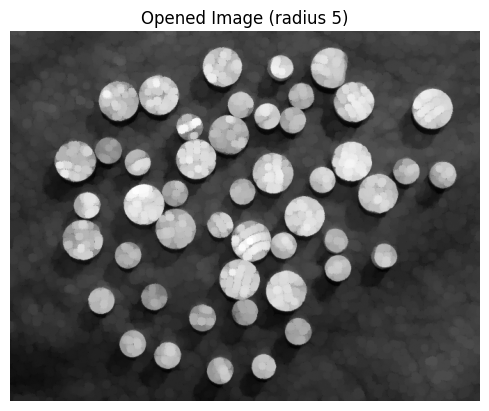

Opening with radius = 10


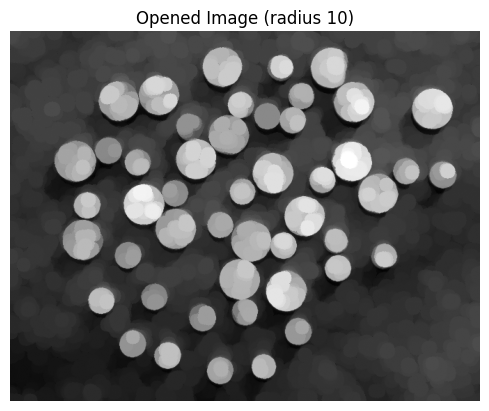

Opening with radius = 15


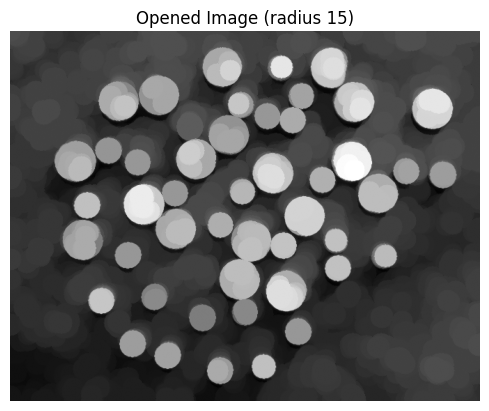

Opening with radius = 20


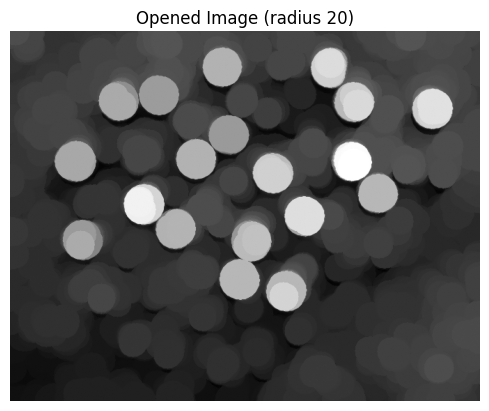

Opening with radius = 25


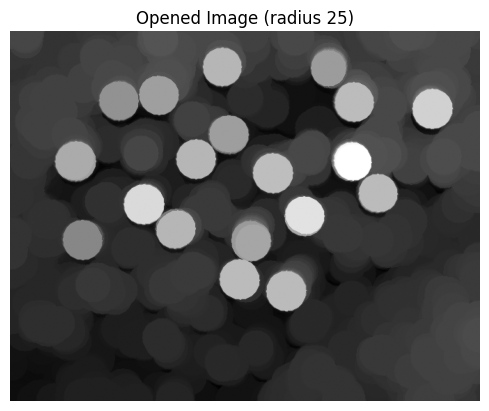

Opening with radius = 30


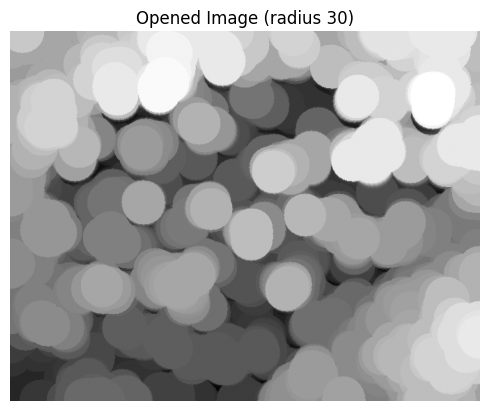

Opening with radius = 35


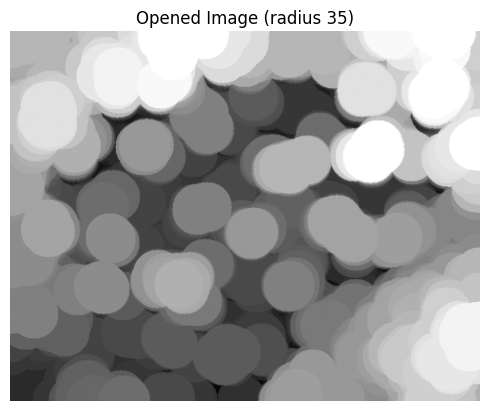

Opening with radius = 40


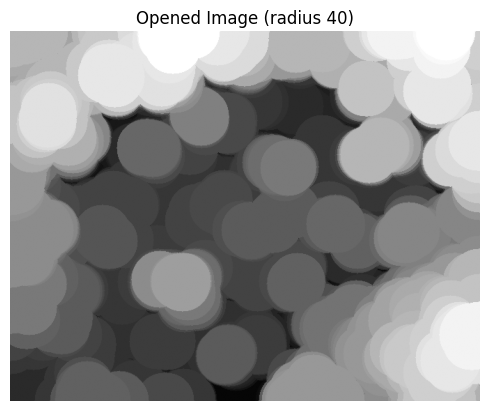

Opening with radius = 45


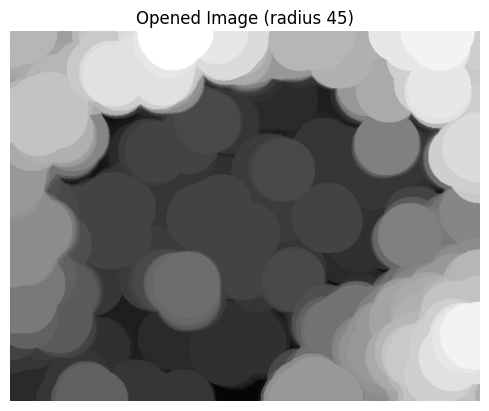

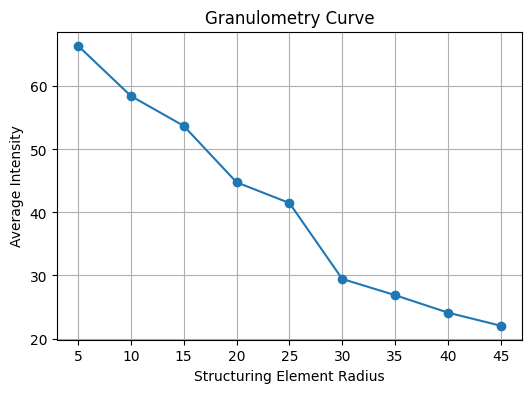

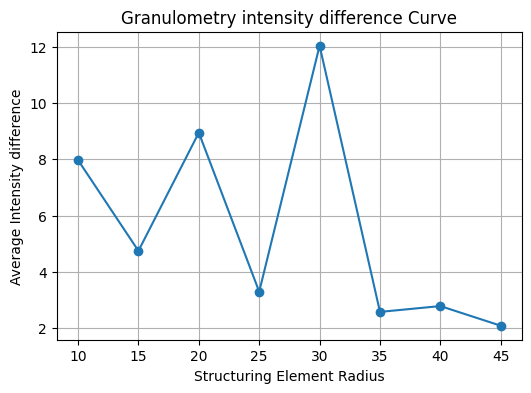

In [61]:
#Generate output for Task 2 here
import os
os.makedirs('output_images', exist_ok=True)

image = cv2.imread('../DIP3E_CH09_Original_Images/Fig0941(a)(wood_dowels).tif', cv2.IMREAD_GRAYSCALE)
cv2.imwrite('output_images/task2_original.png', image)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()
area_graph = granulometry(image)

## Analysis:
[Write your analysis here]

# Task 3
Consider the image given in "FigP0934(blobs_in_circular_arrangement).tif", which shows a region of small circles enclosed by a region of larger circles. Locate the boundary between those distinct texture regions.

In [ ]:
def locateBoundary(image):
    # At first to find the required inner circles radius
    binary_img = (image < 128).astype(np.uint8)
    radii = list(range(14, 26, 2))

    plt.figure(figsize=(12, 8))
    for idx, r in enumerate(radii):
        SE = circular_se(r)
        opened_img = opening(binary_img, SE)
        plt.subplot(2, 3, idx + 1)
        plt.imshow(opened_img, cmap='gray')
        plt.title(f"Opening (r = {r})")
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('output_images/task3_openings.png')
    plt.show()

    # Then to find the required radius for properly identifying the outer boundary of larger circles
    SE = circular_se(23)
    opened_img = opening(binary_img, SE)
    radii_outer = list(range(32, 44, 2))

    plt.figure(figsize=(12, 8))
    for idx, r in enumerate(radii_outer):
        SE = circular_se(r)
        dilated = dilation(opened_img, SE)
        closed = erosion(dilated, SE)
        plt.subplot(2, 3, idx + 1)
        plt.imshow(closed, cmap='gray')
        plt.title(f"Closing (r = {r})")
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('output_images/task3_closings.png')
    plt.show()

    # Finally to detect the boundary
    inner_radius = 23
    outer_radius = 38  # Chosen based on trials
    required_radius = outer_radius

    SE = circular_se(inner_radius)
    opened_img = opening(binary_img, SE)

    SE = circular_se(required_radius)
    closed = closing(opened_img, SE)

    SE = circular_se(5)
    final_close = erosion(closed, SE)
    boundary = final_close - closed

    plt.imshow(boundary, cmap='gray')
    plt.title('Boundary')
    plt.axis('off')
    plt.show()

    return boundary

# Task 3: Output and Analysis
Show the output of the locateBoundary function on the mentioned sample image.

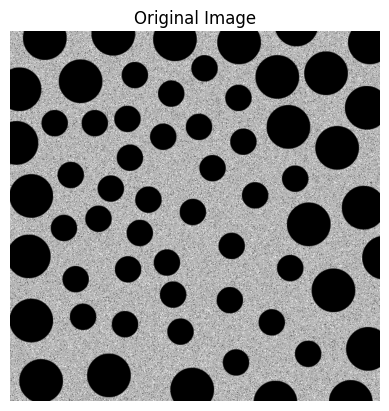

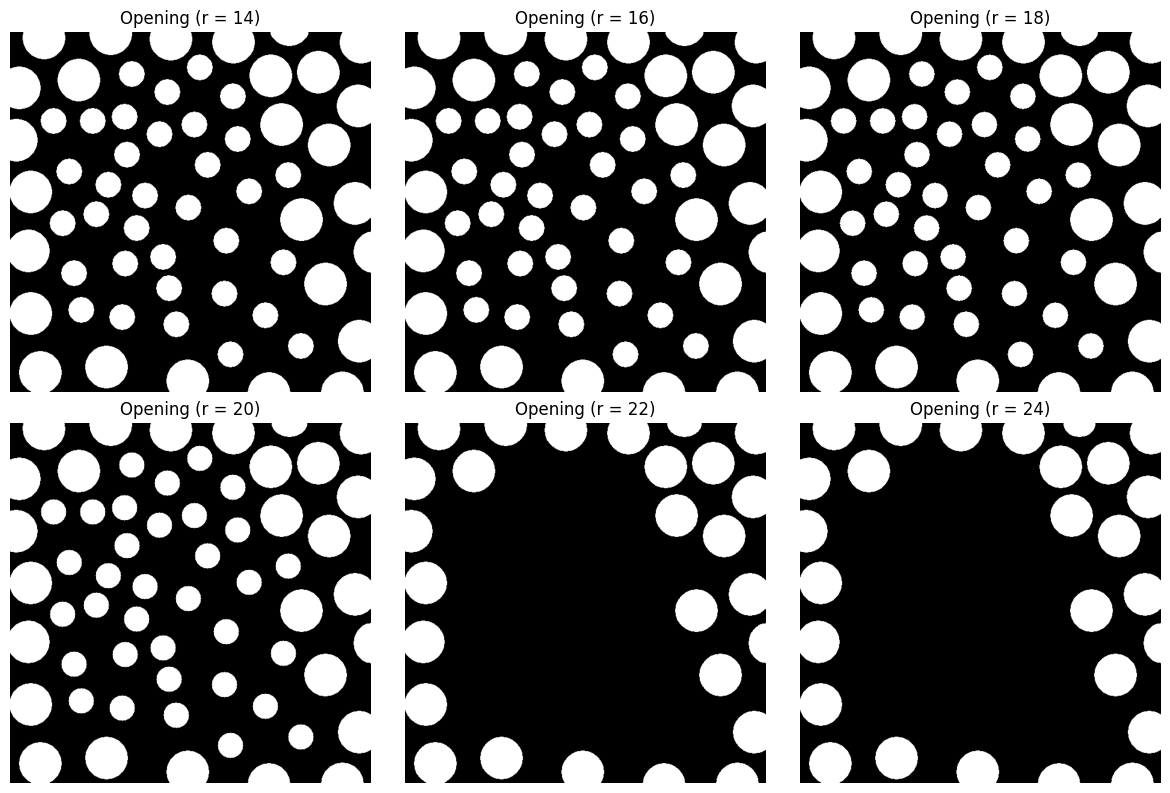

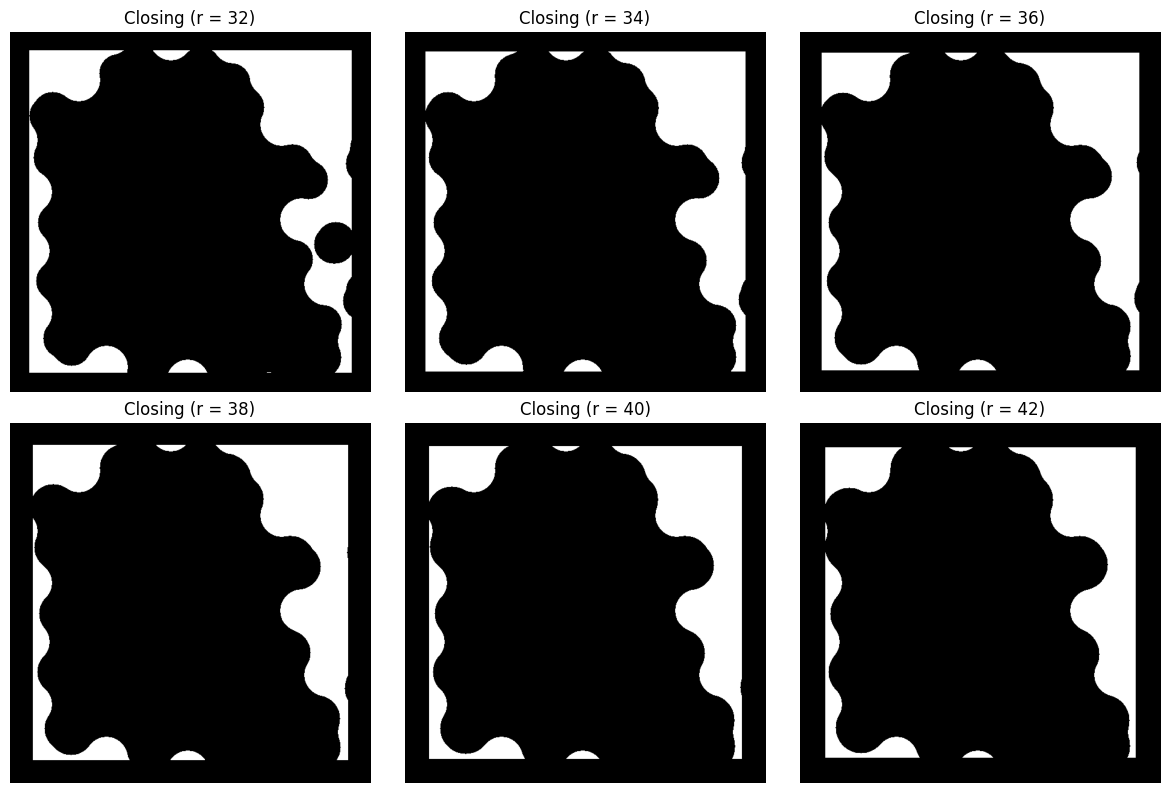

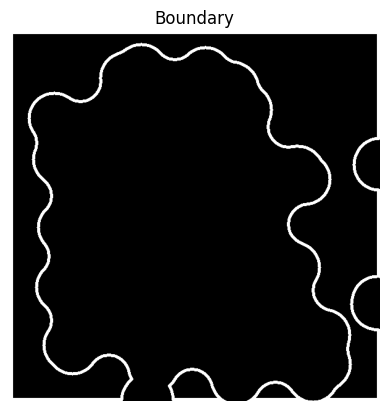

True

In [59]:
#Generate output for Task 3 here
import os
os.makedirs('output_images', exist_ok=True)

image = cv2.imread('../DIP3E_CH09_Original_Images/FigP0934(blobs_in_circular_arrangement).tif', cv2.IMREAD_GRAYSCALE)
cv2.imwrite('output_images/task3_original.png', image)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()
boundary = locateBoundary(image)
cv2.imwrite('output_images/task3_boundary.png', boundary)

#Task 4
A preprocessing step in an application of microscopy is concerned with the issue of isolating individual round particles from similar particles that overlap in groups of two or more particles as shown in the image "FigP0936(bubbles_on_black_background).tif".

Assuming that all particles are of the same size, propose a morphological algorithm that produces three images consisting respectively of
<ol>
<li> Only of particles that have merged with the boundary of the image.</li>

<li> Only overlapping particles.</li>

<li> Only nonoverlapping particles.</li>

</ol>

In [55]:
from scipy.ndimage import label

def particles_touching_boundary(binary_img):
    h, w = binary_img.shape
    boundary = np.zeros_like(binary_img)
    boundary[0, :] = 1
    boundary[-1, :] = 1
    boundary[:, 0] = 1
    boundary[:, -1] = 1
    touching = binary_img * boundary
    cv2.imwrite('output_images/task4_touching_boundary.png', touching * 255)
    SE = circular_se(3)
    prev = np.zeros_like(binary_img)
    curr = touching.copy()
    while not np.array_equal(prev, curr):
        prev = curr.copy()
        curr = dilation(curr, SE) * binary_img
    cv2.imwrite('output_images/task4_boundary_particles_expanded.png', curr * 255)
    return curr

def microscopy(image):
    binary_img = (image > 128).astype(np.uint8)
    cv2.imwrite('output_images/task4_binary.png', binary_img * 255)
    boundaryParticles = particles_touching_boundary(binary_img)
    binary_img_clean = binary_img - boundaryParticles
    cv2.imwrite('output_images/task4_clean_binary.png', binary_img_clean * 255)
    labeled, num = label(binary_img_clean)
    overlappingParticle = np.zeros_like(binary_img)
    nonoverlappingParticles = np.zeros_like(binary_img)
    AREA_THRESHOLD = 530
    for lab in range(1, num + 1):
        component = (labeled == lab)
        area = np.sum(component)
        if area > AREA_THRESHOLD:
            overlappingParticle[component] = 255
        else:
            nonoverlappingParticles[component] = 255
    boundaryParticles = boundaryParticles * 255
    return boundaryParticles, overlappingParticle, nonoverlappingParticles

# Task 4: Output and Analysis
Show the output of the microscopy function on the mentioned sample image.

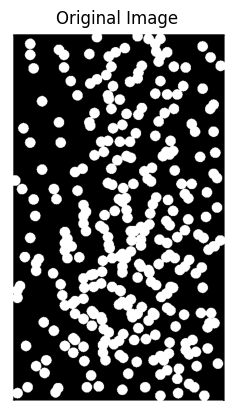

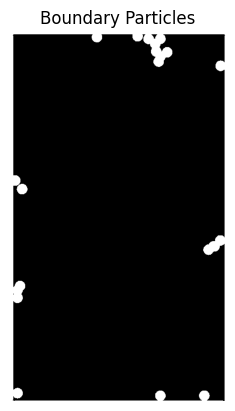

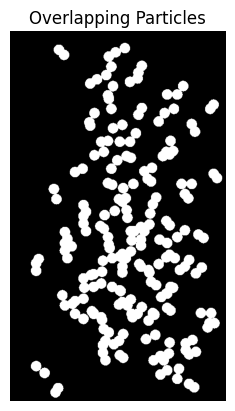

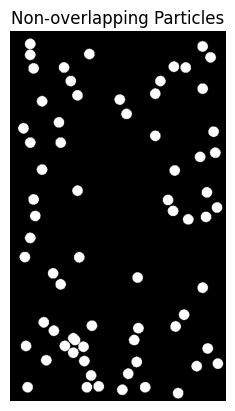

In [63]:
#Generate output for Task 4 here
import os
os.makedirs('output_images', exist_ok=True)

image = cv2.imread('../DIP3E_CH09_Original_Images/FigP0936(bubbles_on_black_background).tif', cv2.IMREAD_GRAYSCALE)
cv2.imwrite('output_images/task4_original.png', image)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

boundaryParticles, overlappingParticle, nonoverlappingParticles = microscopy(image)
cv2.imwrite('output_images/task4_boundary_particles.png', boundaryParticles)
plt.imshow(boundaryParticles, cmap='gray')
plt.title('Boundary Particles')
plt.axis('off')
plt.show()

cv2.imwrite('output_images/task4_overlapping_particles.png', overlappingParticle)
plt.imshow(overlappingParticle, cmap='gray')
plt.title('Overlapping Particles')
plt.axis('off')
plt.show()

cv2.imwrite('output_images/task4_nonoverlapping_particles.png', nonoverlappingParticles)
plt.imshow(nonoverlappingParticles, cmap='gray')
plt.title('Non-overlapping Particles')
plt.axis('off')
plt.show()